<a href="https://colab.research.google.com/github/minyoung347/python101/blob/main/5_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 과소적합과 과대적합

**MNIST에 백색 잡음 픽셀과 0 픽셀을 추가하기**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 2s 0us/step


In [2]:
train_images_with_noise_channels.shape

(60000, 1568)

**백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.6236 - accuracy: 0.8100 - val_loss: 0.2897 - val_accuracy: 0.9160
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2606 - accuracy: 0.9189 - val_loss: 0.2095 - val_accuracy: 0.9373
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1731 - accuracy: 0.9467 - val_loss: 0.1685 - val_accuracy: 0.9488
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1212 - accuracy: 0.9623 - val_loss: 0.1535 - val_accuracy: 0.9535
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0897 - accuracy: 0.9721 - val_loss: 0.1311 - val_accuracy: 0.9597
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0660 - accuracy: 0.9790 - val_loss: 0.1197 - val_accuracy: 0.9649
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0512 - accuracy: 0.9833 - val_loss: 0.1173 - val_accuracy: 0.9654
Epoch 

**검증 정확도 비교 그래프 그리기**

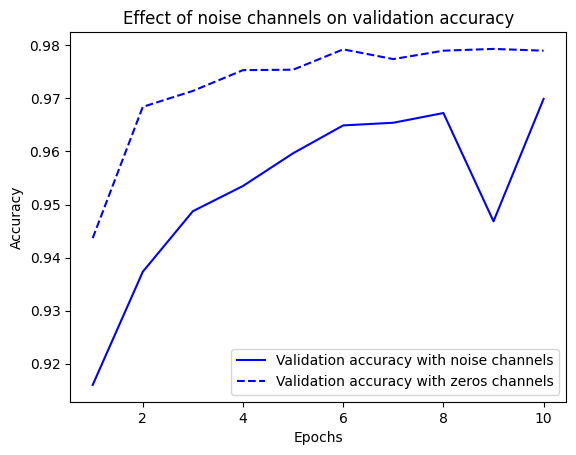

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**랜덤하게 섞은 레이블로 MNIST 모델 훈련하기**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3144 - accuracy: 0.1029 - val_loss: 2.3062 - val_accuracy: 0.1022
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2992 - accuracy: 0.1155 - val_loss: 2.3092 - val_accuracy: 0.1053
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2913 - accuracy: 0.1257 - val_loss: 2.3173 - val_accuracy: 0.1019
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2796 - accuracy: 0.1363 - val_loss: 2.3233 - val_accuracy: 0.1044
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2651 - accuracy: 0.1488 - val_loss: 2.3367 - val_accuracy: 0.1006
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2455 - accuracy: 0.1637 - val_loss: 2.3585 - val_accuracy: 0.0967
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2225 - accuracy: 0.1797 - val_loss: 2.3658 - val_accuracy: 0.1041

## 머신 러닝 모델 평가

**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

**같은 모델을 적절한 학습률로 훈련하기**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

### 모델 용량 늘리기

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

#### 네트워크 크기 축소

**원본 모델**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**작은 용량의 모델**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**큰 용량의 모델**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5666 - accuracy: 0.7082 - val_loss: 0.3856 - val_accuracy: 0.8372
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3223 - accuracy: 0.8647 - val_loss: 0.2869 - val_accuracy: 0.8815
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2348 - accuracy: 0.9115 - val_loss: 0.4342 - val_accuracy: 0.8208
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1858 - accuracy: 0.9289 - val_loss: 0.3126 - val_accuracy: 0.8779
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1490 - accuracy: 0.9475 - val_loss: 0.3091 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1114 - accuracy: 0.9591 - val_loss: 0.2866 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0811 - accuracy: 0.9743 - val_loss: 0.3305 - val_accuracy: 0.8847
Epoch 8/20
30

#### 가중치 규제 추가하기

**모델에 L2 가중치 추가하기**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.6246 - accuracy: 0.7769 - val_loss: 0.5054 - val_accuracy: 0.8563
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4252 - accuracy: 0.8911 - val_loss: 0.4004 - val_accuracy: 0.8826
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3399 - accuracy: 0.9137 - val_loss: 0.3832 - val_accuracy: 0.8762
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3021 - accuracy: 0.9217 - val_loss: 0.3547 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2785 - accuracy: 0.9289 - val_loss: 0.3531 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2564 - accuracy: 0.9413 - val_loss: 0.3512 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2477 - accuracy: 0.9426 - val_loss: 0.3678 - val_accuracy: 0.8818
Epoch 8/20
30

**케라스에서 사용할 수 있는 가중치 규제**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가

**IMDB 모델에 드롭아웃 추가하기**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.6489 - accuracy: 0.6125 - val_loss: 0.5486 - val_accuracy: 0.8080
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5327 - accuracy: 0.7443 - val_loss: 0.4282 - val_accuracy: 0.8618
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4510 - accuracy: 0.8065 - val_loss: 0.3572 - val_accuracy: 0.8783
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3877 - accuracy: 0.8421 - val_loss: 0.3425 - val_accuracy: 0.8644
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3459 - accuracy: 0.8671 - val_loss: 0.2915 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2980 - accuracy: 0.8939 - val_loss: 0.2798 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2696 - accuracy: 0.9057 - val_loss: 0.2742 - val_accuracy: 0.8924
Epoch 8/20
30